In [45]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [75]:
titanic = titanic.dropna(subset=['age','fare'], how='any', axis=0)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


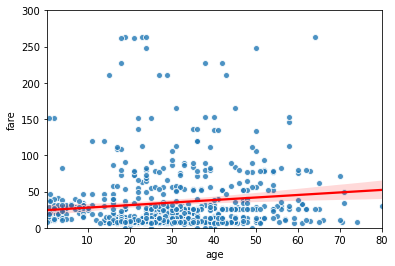

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.regplot(titanic[['age']], titanic[['fare']], line_kws = {'color':'red'},
            scatter_kws = {'edgecolor':'white'})
plt.ylim(0,300)
plt.show()

In [77]:
import numpy as np

print(np.corrcoef(titanic['age'], titanic['fare']))

[[1.         0.09606669]
 [0.09606669 1.        ]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


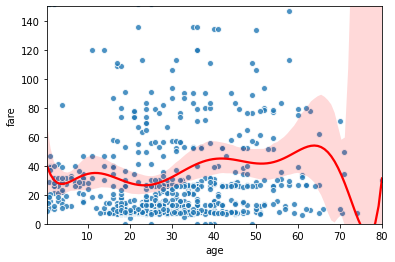

In [78]:
sns.regplot(titanic[['age']], titanic[['fare']], line_kws = {'color':'red'},
            scatter_kws = {'edgecolor':'white'}, order=9)
plt.ylim(0,150)
plt.show()

In [79]:
class_age = titanic.groupby(['class'])


First_class_age = class_age.get_group('First')
Second_class_age = class_age.get_group('Second')
Third_class_age = class_age.get_group('Third')

print(First_class_age.head(3))
print(Second_class_age.head(3))
print(Third_class_age.head(3))

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
3         1       1  female  35.0  ...     C  Southampton    yes  False
6         0       1    male  54.0  ...     E  Southampton     no   True

[3 rows x 15 columns]
    survived  pclass     sex   age  ...  deck  embark_town  alive  alone
9          1       2  female  14.0  ...   NaN    Cherbourg    yes  False
15         1       2  female  55.0  ...   NaN  Southampton    yes   True
20         0       2    male  35.0  ...   NaN  Southampton     no   True

[3 rows x 15 columns]
   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[3 rows x 15 columns]


In [80]:
First_class_age.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


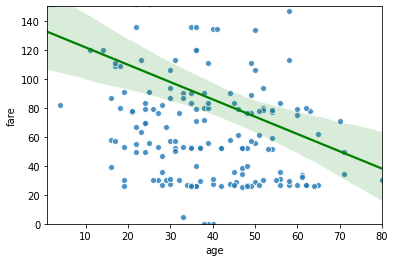

In [81]:
sns.regplot(x='age', y='fare', data=First_class_age,
            line_kws={'color':'green'},
            scatter_kws = {'edgecolor':'white'})
plt.ylim(0,150)
plt.show()

In [83]:
import numpy as np
print(np.corrcoef(First_class_age['age'],First_class_age['fare']))

[[ 1.        -0.2186108]
 [-0.2186108  1.       ]]


In [84]:
survived_class = titanic.groupby(['class'])
First_class_survived = survived_class.get_group('First')
survived_class.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [85]:
First_class_survived.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


In [88]:
print(np.corrcoef(First_class_survived['pclass'], First_class_survived['survived']))

[[nan nan]
 [nan  1.]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [87]:
First_class_survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     186 non-null    int64  
 1   pclass       186 non-null    int64  
 2   sex          186 non-null    object 
 3   age          186 non-null    float64
 4   sibsp        186 non-null    int64  
 5   parch        186 non-null    int64  
 6   fare         186 non-null    float64
 7   embarked     184 non-null    object 
 8   class        186 non-null    object 
 9   who          186 non-null    object 
 10  adult_male   186 non-null    bool   
 11  deck         159 non-null    object 
 12  embark_town  184 non-null    object 
 13  alive        186 non-null    object 
 14  alone        186 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 20.7+ KB


In [97]:
a = titanic.groupby(['class','sex'])
a.mean(['age','fare'])


survived  pclass        age  ...        fare  adult_male     alone
class  sex                                  ...                                  
First  female  0.964706     1.0  34.611765  ...  107.946275    0.000000  0.376471
       male    0.396040     1.0  41.281386  ...   71.142781    0.970297  0.534653
Second female  0.918919     2.0  28.722973  ...   21.951070    0.000000  0.405405
       male    0.151515     2.0  30.740707  ...   21.113131    0.909091  0.636364
Third  female  0.460784     3.0  21.750000  ...   15.875369    0.000000  0.372549
       male    0.150198     3.0  26.507589  ...   12.162695    0.889328  0.739130

[6 rows x 8 columns]

In [98]:
b = titanic.groupby(['sex'])
b.mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.754789,2.065134,27.915709,0.639847,0.708812,47.582759,0.0000,0.383142
male,0.205298,2.335541,30.726645,0.439294,0.271523,27.268836,0.9117,0.671082


In [143]:
d = titanic.groupby(['survived'])
d.mean()

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
0,2.485849,30.626179,0.525943,0.365566,22.965456,0.804245,0.646226
1,1.872414,28.343690,0.493103,0.527586,51.843205,0.248276,0.448276


In [99]:
c = titanic.groupby(['class'])
c.mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.655914,1.0,38.233441,0.451613,0.408602,87.961582,0.526882,0.462366
Second,0.479769,2.0,29.877630,0.427746,0.404624,21.471556,0.520231,0.537572
Third,0.239437,3.0,25.140620,0.585915,0.456338,13.229435,0.633803,0.633803


In [114]:
titanic_sex = titanic.groupby(['sex'])
titanic_female = titanic_sex.get_group('female')
titanic_male = titanic_sex.get_group('male')


In [115]:
titanic_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     453 non-null    int64  
 1   pclass       453 non-null    int64  
 2   sex          453 non-null    object 
 3   age          453 non-null    float64
 4   sibsp        453 non-null    int64  
 5   parch        453 non-null    int64  
 6   fare         453 non-null    float64
 7   embarked     453 non-null    object 
 8   class        453 non-null    object 
 9   who          453 non-null    object 
 10  adult_male   453 non-null    bool   
 11  deck         94 non-null     object 
 12  embark_town  453 non-null    object 
 13  alive        453 non-null    object 
 14  alone        453 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 50.4+ KB


In [119]:
female = int(len(titanic_female))/int(len(titanic.sex)) * 100

In [120]:
male = int(len(titanic_male))/int(len(titanic.sex)) * 100

In [127]:
DF1 = pd.DataFrame({'sex_count':[female, male]}, index=['female','male'])
DF1

,sex_count
female,36.554622
male,63.445378


In [146]:
survived = titanic.groupby(['survived'])

titanic_survived = len(survived.get_group(1)) / len(titanic.index) * 100 
titanic_no = len(survived.get_group(0)) / len(titanic.index) * 100
print(titanic_survived, titanic_no)

40.61624649859944 59.38375350140056


In [148]:
DF2 = pd.DataFrame({'survived_count':[titanic_survived, titanic_no]}, index=['survived','not'])
DF2

,survived_count
survived,40.616246
not,59.383754


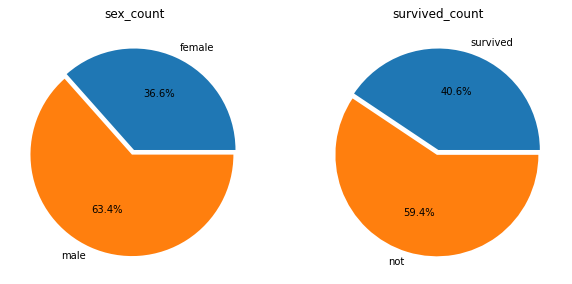

In [161]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots(1, 2, figsize=(10,6))

# explode = (행별 값) 파이 조각 간격조정
DF1['sex_count'].plot.pie(explode=[0, 0.05],
                                                ax = ax[0],
                                                autopct = '%1.1f%%')
ax[0].set_title('sex_count')
ax[0].set_ylabel('')

DF2['survived_count'].plot.pie(explode=[0, 0.05],
                                                ax = ax[1],
                                                autopct = '%1.1f%%')
ax[1].set_title('survived_count')
ax[1].set_ylabel('')

plt.show()

In [117]:
_print(sum(titanic_female['fare']))

12419.100199999992


In [118]:
print(sum(titanic_male['fare']))

12352.782799999995


In [169]:
most_freq = titanic['embark_town'].value_counts(dropna=False)
most_freq

Southampton    554
Cherbourg      130
Queenstown      28
NaN              2
Name: embark_town, dtype: int64

In [174]:
most_freq = most_freq.idxmax()


AttributeError: ignored

In [175]:
most_freq

'Southampton'

In [176]:
titanic['embark_town'].fillna(most_freq, inplace=True)


In [177]:
embark_town = titanic['embark_town'].value_counts(dropna=False)
embark_town

Southampton    556
Cherbourg      130
Queenstown      28
Name: embark_town, dtype: int64

In [188]:
grouped = titanic.groupby(['embark_town'])
for key in ['Southampton','Cherbourg','Queenstown']:
  length = len(grouped.get_group(key))
  print(key, length, '\n')

Southampton 556 

Cherbourg 130 

Queenstown 28 



In [190]:
DF3 = pd.DataFrame({'embark_town':[556, 130, 28]}, index=['Southampton','Cherbourg','Queenstown'])
DF3

,embark_town
Southampton,556
Cherbourg,130
Queenstown,28


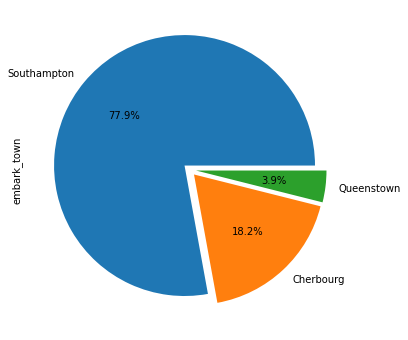

In [194]:
figure = plt.subplots(figsize=(6,6))

explode_set = [0.05,0.05,0.05]
DF3['embark_town'].plot.pie(explode=explode_set,

                                                autopct = '%1.1f%%')

plt.show()


embark_town과 survived 간의 상관계수


In [197]:
grouped = titanic.groupby(['embark_town'])
grouped

In [206]:
Southampton = grouped.get_group('Southampton')
Southampton = len(Southampton)
Southampton

556

In [207]:
Cherbourg = grouped.get_group('Cherbourg')
Cherbourg = len(Cherbourg)
Cherbourg

130

In [208]:

Queenstown = grouped.get_group('Queenstown')
Queenstown = len(Queenstown)
Queenstown

28

In [209]:
import numpy as np

print(np.corrcoef(Southampton['embark_town'], Southampton['survived']))

TypeError: ignored